**Project Overview:**

      *Symptom-Based Disease Prediction*
This project aims to create an AI-powered system that predicts diseases based on a description of symptoms provided by users. It leverages natural language processing (NLP) and deep learning to process text data and classify it into pre-defined disease categories.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Symptom2Disease (1).csv to Symptom2Disease (1).csv


In [3]:
data = pd.read_csv('Symptom2Disease (1).csv')

In [4]:
# Data preprocessing
data = data[['label', 'text']]  # Keep relevant columns
data.dropna(inplace=True)  # Drop rows with missing values

<ipython-input-4-120a3660cee8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Drop rows with missing values


In [5]:
# Encode labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
num_classes = len(label_encoder.classes_)

In [7]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_encoded'], test_size=0.2, random_state=42)

In [13]:
tokenizer = Tokenizer(num_words=1576, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")


Vocabulary size: 1576


In [14]:
# Convert text to sequences
X = tokenizer.texts_to_sequences(data['text'])

# Padding sequences
X_padded = pad_sequences(X, maxlen=100, padding='post', truncating='post')


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length
max_len = 100  # You can adjust this based on your dataset and model

# Pad the sequences to make them all the same length
X_padded = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')

# Check the shape of the padded sequences
print(X_padded.shape)


(1200, 100)


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_padded, data['label_encoded'], test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set: X_train: (960, 100), y_train: (960,)
Testing set: X_test: (240, 100), y_test: (240,)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Initialize the model
model = Sequential()

# Embedding layer: Converts integer sequences into dense vectors
model.add(Embedding(input_dim=1576, output_dim=128, input_length=100))

# Add a Conv1D layer to capture local features
model.add(Conv1D(128, 5, activation='relu'))

# Max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))

# Another Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build the model (optional but useful)
model.build(input_shape=(None, 100))

# Print model summary to ensure everything is correct
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 128)            │         201,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 96, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 48, 256)             │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721,112 (2.75 MB)

 Trainable params: 721,112 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 363ms/step - accuracy: 0.0418 - loss: 3.9398 - val_accuracy: 0.0292 - val_loss: 3.6683
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - accuracy: 0.1198 - loss: 3.4622 - val_accuracy: 0.2583 - val_loss: 2.7452
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.3056 - loss: 2.5673 - val_accuracy: 0.4833 - val_loss: 2.0131
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.4771 - loss: 1.8982 - val_accuracy: 0.5458 - val_loss: 1.7013
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.6247 - loss: 1.4377 - val_accuracy: 0.5875 - val_loss: 1.4853
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.7252 - loss: 1.1286 - val_accuracy: 0.7167 - val_loss: 1.1825
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.8518 - loss: 0.9067 - val_accuracy: 0.7667 - val_loss: 1.1302
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.8738 - loss: 0.7758 - val_accur

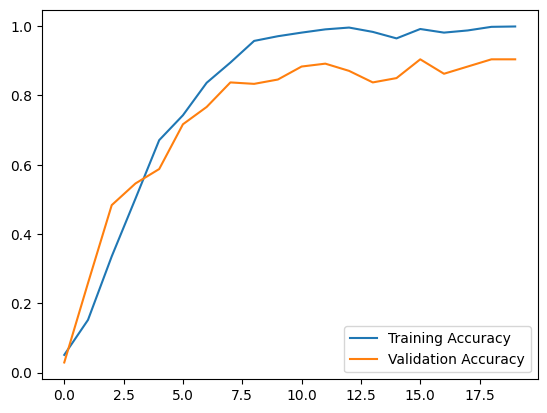

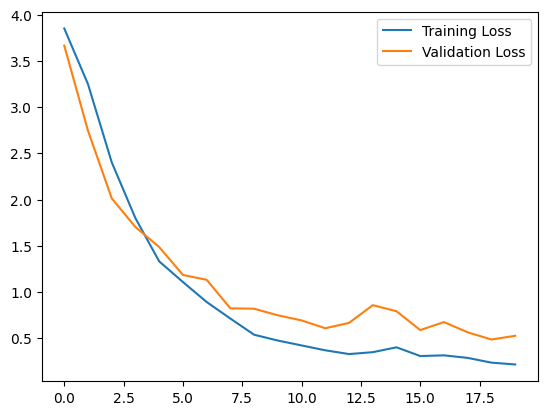

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [24]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9088 - loss: 0.5226
Test Accuracy: 0.90


In [25]:
# Real-time prediction function
def predict_disease(symptoms):
    seq = tokenizer.texts_to_sequences([symptoms])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded_seq)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

In [28]:
# Example usage
symptoms_input = "I've been dealing with ongoing back pain, a constant cough, and a sense of weakness in my arms and legs. I also feel unsteady and dizzy, struggling to keep my balance, and my neck has been aching as well."
predicted_disease = predict_disease(symptoms_input)
print(f"Predicted Disease: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Disease: Cervical spondylosis
